<a href="https://colab.research.google.com/github/MateoRivera/network-dynamics/blob/main/H1/Punto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Point a

In [2]:
#Import liberries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
#Create the graph
def create_graph():
  G = nx.DiGraph()
  G.add_edge('o', 'a', capacity=3)  # e1
  G.add_edge('o', 'b', capacity=3)  # e3
  G.add_edge('a', 'd', capacity=2)  # e2
  G.add_edge('b', 'd', capacity=2)  # e4
  G.add_edge('b', 'c', capacity=3)  # e5
  G.add_edge('c', 'd', capacity=1)  # e6
  G.add_edge('a', 'b', capacity=1)  # e7
  return G


In [ ]:
#Define graph as directed one
pos = nx.spring_layout(G)

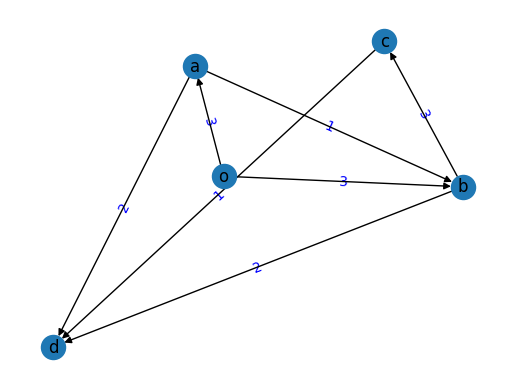

In [ ]:
nx.draw_networkx_edge_labels(G,pos,edge_labels={("o","a"):'3',("o","b"):'3',("a","d"):'2',("b","d"):'2',("b","c"):'3',("c","d"):'1',("a","b"):'1'},font_color='blue')
nx.draw(G, pos, with_labels=True) #We have two rows so it is an undirected graph

**Cuts**
- $U=\{o\},U^C=\{a,b,c,d\}$ -> $C_U = 6$
- $U=\{o,a\},U^C=\{b,c,d\}$ -> $C_U = 6$
- $U=\{o,a,b\},U^C=\{c,d\}$ -> $C_U = 7$
- $U=\{o,a,b,c\},U^C=\{d\}$ -> $C_U = 5$

In [ ]:
nx.algorithms.flow.minimum_cut(G,"o","d")

(5, ({'a', 'b', 'c', 'o'}, {'d'}))

## Point b

**Max flow min cut Theorem**: the maximal flow that can send from $o$ to $d$ equals the minimal cut capacity among the o-d cuts of the network.

In [ ]:
# Current maxim flow
nx.algorithms.flow.maximum_flow(G,"o","d")
# maximum_flow returns the maximal throughput, plus a dictionary containing the value of the flow that goes through each edge.

(5,
 {'o': {'a': 3, 'b': 2},
  'a': {'d': 2, 'b': 1},
  'b': {'d': 2, 'c': 1},
  'd': {},
  'c': {'d': 1}})

The extra units of capacity must be allocated in order to remain wihout a botterlneck or finish with the extra units of capacity.

Cómo debe ser el código:
  * La capacidad se debe ir restando cada vez que se asigne
  * Calcular el min cut
  * Agregar una unidad de capacidad al nodo con capacidad minima
  actualizar las capacidades del grapho
  * volver a calcular el mincut
  ....
  * hasta que la capacidad restante sea igual a 0 todos los cuts tengan la misma capacidad

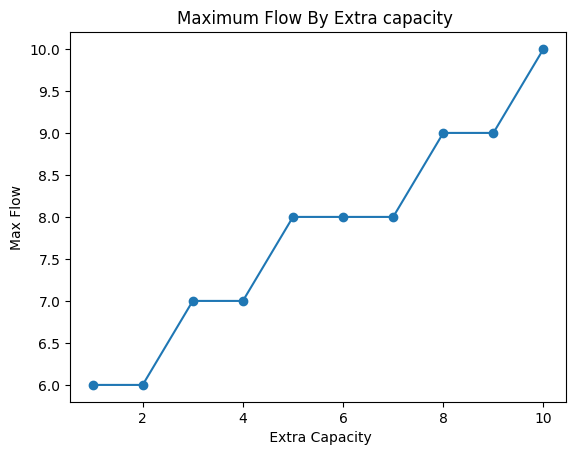

In [9]:
def compute_max_flow_min_cut(G):

    # Compute minimum cut (capacity of the cut)
    _, partition = nx.minimum_cut(G, 'o', 'd')

    # Get the edges in the minimum cut
    reachable, non_reachable = partition


    cutset={}
    for u in reachable:
        for v in G[u]:
            if v in non_reachable:
                cutset[G[u][v]['capacity']]=(u, v)


    return cutset
max_flows = {}


G=create_graph()
i=0
while True:
    if i == 11 :
        break
    elif i>0:
        borders = compute_max_flow_min_cut(G)

        min_capacity_border = min(borders.keys())
        u,v =borders[min_capacity_border]
        G[u][v]['capacity'] += 1
        max_flows[i],_=nx.algorithms.flow.maximum_flow(G,"o","d")
    i +=1

plt.plot(max_flows.keys(), max_flows.values(), marker = 'o')

# Plot formatting
plt.xlabel(' Extra Capacity')
plt.ylabel('Max Flow')
plt.title('Maximum Flow By Extra capacity ')
plt.show()


## Point c

De acuerdo con las capacidades de las aristas, los enlaces entre los nodos a-d y c-d son los de menor capacidad, por lo que aquí se está configurando claramente un cuello de botella, de forma que si se añadiera un nuevo enlace entre a y d, se configuraría un camino directo entre a y d, ya que las capacidades entre  
o → b → d serían las mismas, y sólo restaria distribuir proporcionalmente las capacidades adicionales entre los edges que presentan cuellos de botella

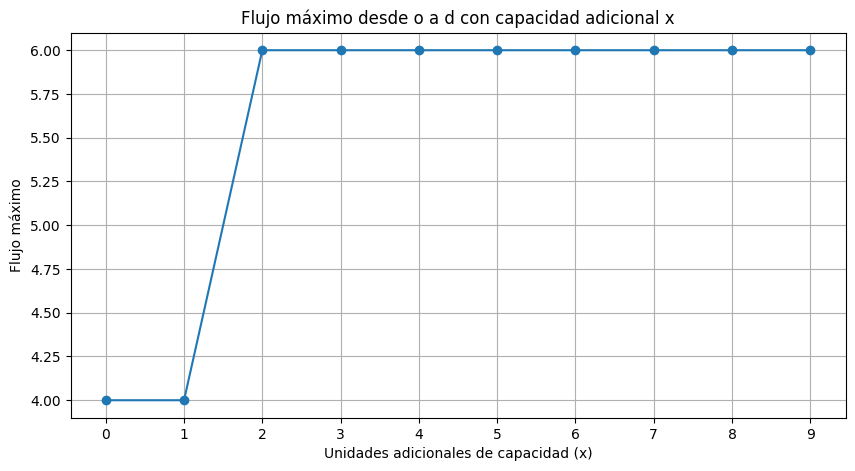

In [7]:


# Crear un grafo dirigido con las capacidades dadas
G = create_graph()

# Añadir el nuevo enlace e8 con capacidad c8 = 1 entre b y d
G.add_edge('b', 'd', capacity=1)

# Función para calcular el flujo máximo
def calcular_flujo_maximo(G):
    return nx.maximum_flow_value(G, 'o', 'd')

# Probar diferentes valores de x para distribuir la capacidad adicional
valores_x = range(0, 10)
flujo_maximo_datos = []

for x in valores_x:
    # Copiar el grafo original antes de modificarlo
    G_temp = G.copy()

    # Aumentar la capacidad de los arcos críticos (representativos de cuellos de botella)
    G_temp['a']['d']['capacity'] += x // 2
    G_temp['c']['d']['capacity'] += x // 2

    # Calcular el nuevo flujo máximo
    flujo_maximo = calcular_flujo_maximo(G_temp)
    flujo_maximo_datos.append(flujo_maximo)

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(valores_x, flujo_maximo_datos, marker='o')
plt.title('Flujo máximo desde o a d con capacidad adicional x')
plt.xlabel('Unidades adicionales de capacidad (x)')
plt.ylabel('Flujo máximo')
plt.grid(True)
plt.xticks(valores_x)
plt.show()
